**About the Dataset**

The data used in this project consist of the historical stock prices of Apple obtained via Yahoo Finance. Data set contains the following variables; Date (May 2014 - May 2020), Open, High, Low, Close, Adjusted Close and Volume.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("stock.csv",parse_dates=["Date"])

In [ ]:
data.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [ ]:
stock = data.loc[:,["Date","Adj Close Price"]]
stock.head()

,Date,Adj Close Price
0,2014-05-27,80.948952
1,2014-05-28,80.739334
2,2014-05-29,82.210480
3,2014-05-30,81.902557
4,2014-06-02,81.339699


In [ ]:
stock.rename(columns= {"Adj Close Price":"Apple"},inplace=True)

In [ ]:
stock.head()

,Date,Apple
0,2014-05-27,80.948952
1,2014-05-28,80.739334
2,2014-05-29,82.210480
3,2014-05-30,81.902557
4,2014-06-02,81.339699


In [ ]:
# mean of 30 days
stock.iloc[:30,1].mean(),stock.iloc[1:31,1].mean(),stock.iloc[2:32,1].mean()

(83.3759654, 83.55753913333332, 83.73553443333331)

In [ ]:
# short term Simple Moving Average : 30 days
stock["SMA30"] = stock["Apple"].rolling(30).mean()

# long term Simple Moving Average : 100 days
stock["SMA100"] = stock["Apple"].rolling(100).mean()

In [ ]:
stock.tail()

,Date,Apple,SMA30,SMA100
1505,2020-05-18,314.959991,287.864806,289.734840
1506,2020-05-19,313.140015,289.577426,290.037927
1507,2020-05-20,319.230011,291.594106,290.345799
1508,2020-05-21,316.850006,293.310716,290.630966
1509,2020-05-22,318.890015,295.031499,290.919420


In [16]:
for i,row in stock.iterrows():
    print(row["SMA30"])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
83.3759654
83.55753913333334
83.73553443333334
83.86992543333334
84.0517146
84.21815086666668
84.32994236666667
84.359313
84.41822716666667
84.47002593333333
84.5008207
84.5895816
84.68528473333335
84.84770923333332
85.0813836
85.26796173333334
85.4512175
85.5544689
85.683382
85.82467276666668
85.95419063333334
86.09548243333333
86.23405436666667
86.36421283333333
86.49969103333333
86.60588126666667
86.7327937
86.86880063333334
87.0027682
87.11396713333333
87.28545000000001
87.45694023333334
87.63929929999999
87.8386765
88.00759509999999
88.19090603333333
88.42814279999999
88.72004293333333
88.97907260000001
89.2771688
89.41943106666668
89.4622424
89.5356753
89.5712776
89.55489653333333
89.64916253333332
89.76341906666667
89.96164016666667
90.1429497
90.31720023333332
90.5274844
90.7489713
90.94558003333333
91.13733266666667
91.33909836666668
91.51446813333334
91.53358306

In [18]:
'''
When the short-term SMA (SMA30) crosses above the long-term SMA (SMA100), it generates a buy signal.
Conversely, when SMA30 crosses below SMA100, it generates a sell signal.
If the two SMAs are equal, it indicates holding the current position without taking any action.
'''

def buy_sell(df):
    buy_stock_price = []
    sell_stock_price = []
    holding = [] # 0 = not hold, 1 = hold
    actions = [] # -1 = sell, 0 = hold, 1 = buy
    signal = 0

    for i,row in stock.iterrows():
        if row["SMA30"] > row["SMA100"]:
            holding.append(1)
            if signal != 1:
                buy_stock_price.append(row["Apple"])
                sell_stock_price.append(np.nan)
                signal = 1
                actions.append(signal)

            else:
                buy_stock_price.append(np.nan)
                sell_stock_price.append(np.nan)
                actions.append(0)


        elif row["SMA30"] < row["SMA100"]:
            holding.append(0)
            if signal != -1:
                buy_stock_price.append(np.nan)
                sell_stock_price.append(row["Apple"])
                signal = -1
                actions.append(signal)

            else:
                buy_stock_price.append(np.nan)
                sell_stock_price.append(np.nan)
                actions.append(0)

        else:
            holding.append(0)
            buy_stock_price.append(np.nan)
            sell_stock_price.append(np.nan)
            actions.append(0)

    return buy_stock_price, sell_stock_price, holding, actions

In [19]:
buysell = buy_sell(stock)

In [20]:
pd.options.display.max_rows = 50

In [22]:
stock["Buy Price"] = buysell[0]
stock["Sell Price"] = buysell[1]
stock["Hold"] = buysell[2]
stock["Actions"] = buysell[3]

stock.iloc[100:]

,Date,Apple,SMA30,SMA100,Buy Price,Sell Price,Hold,Actions
100,2014-10-16,87.617805,91.117307,87.847052,NaN,NaN,1,0
101,2014-10-17,88.901215,91.077864,87.928671,NaN,NaN,1,0
102,2014-10-20,90.803581,91.120341,88.014602,NaN,NaN,1,0
103,2014-10-21,93.270294,91.256267,88.128280,NaN,NaN,1,0
104,2014-10-22,93.743599,91.316646,88.252319,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...
1505,2020-05-18,314.959991,287.864806,289.734840,NaN,NaN,0,0
1506,2020-05-19,313.140015,289.577426,290.037927,NaN,NaN,0,0
1507,2020-05-20,319.230011,291.594106,290.345799,319.230011,NaN,1,1
1508,2020-05-21,316.850006,293.310716,290.630966,NaN,NaN,1,0


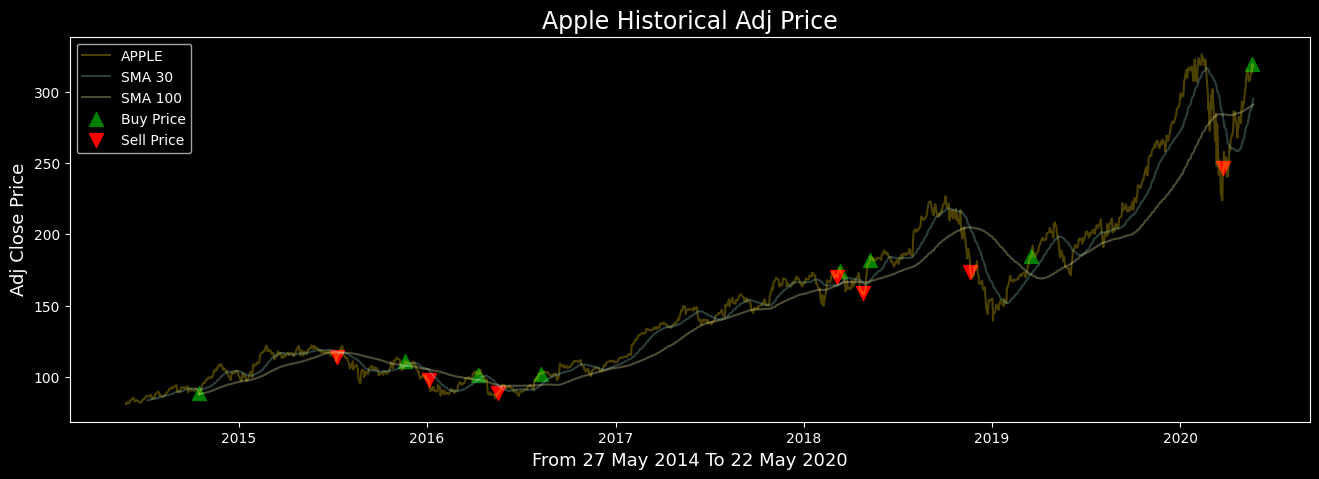

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(16,5))

plt.plot(stock["Date"],stock["Apple"],label = "APPLE",alpha=0.3, color = "gold")
plt.plot(stock["Date"],stock["SMA30"], label = "SMA 30",alpha=0.3)
plt.plot(stock["Date"],stock["SMA100"], label =  "SMA 100",alpha=0.3)

plt.scatter(stock["Date"],stock["Buy Price"],\
            label ="Buy Price",s = 100,color = "green", marker = "^")

plt.scatter(stock["Date"],stock["Sell Price"],\
            label ="Sell Price",s = 100,color = "red", marker = "v")

plt.title("Apple Historical Adj Price", fontsize = 17)
plt.xlabel("From 27 May 2014 To 22 May 2020", fontsize = 13)
plt.ylabel("Adj Close Price", fontsize = 13)

plt.legend()
plt.show()

**Conclusion**

This visualization provides a comprehensive view of Apple's stock performance, with clear indicators for buy and sell signals based on the SMA crossover strategy. It allows investors or analysts to assess the strategy's effectiveness and make informed decisions based on historical data.






